In [1]:
import transmon as pt
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:

N = 10
Ec = 1.0
Ej = 50.0
ng=0.5
T_max = 150
T1 = 100
T2 = 1
Points=1000
P0=0.99
R0 = 100 * np.pi

# Testing the final overlap due to the width of the EJ Pulse

[(<Figure size 1500x800 with 20 Axes>, <AxesSubplot:>),
 (<Figure size 1500x800 with 20 Axes>, <AxesSubplot:>),
 (<Figure size 1500x800 with 20 Axes>, <AxesSubplot:>),
 (<Figure size 1500x800 with 20 Axes>, <AxesSubplot:>),
 (<Figure size 1500x800 with 20 Axes>, <AxesSubplot:>),
 (<Figure size 1500x800 with 20 Axes>, <AxesSubplot:>),
 (<Figure size 1500x800 with 20 Axes>, <AxesSubplot:>),
 (<Figure size 1500x800 with 20 Axes>, <AxesSubplot:>),
 (<Figure size 1500x800 with 20 Axes>, <AxesSubplot:>),
 (<Figure size 1500x800 with 20 Axes>, <AxesSubplot:>),
 (<Figure size 1500x800 with 20 Axes>, <AxesSubplot:>),
 (<Figure size 1500x800 with 20 Axes>, <AxesSubplot:>),
 (<Figure size 1500x800 with 20 Axes>, <AxesSubplot:>),
 (<Figure size 1500x800 with 20 Axes>, <AxesSubplot:>),
 (<Figure size 1500x800 with 20 Axes>, <AxesSubplot:>),
 (<Figure size 1500x800 with 20 Axes>, <AxesSubplot:>),
 (<Figure size 1500x800 with 20 Axes>, <AxesSubplot:>),
 (<Figure size 1500x800 with 20 Axes>, <AxesSubp

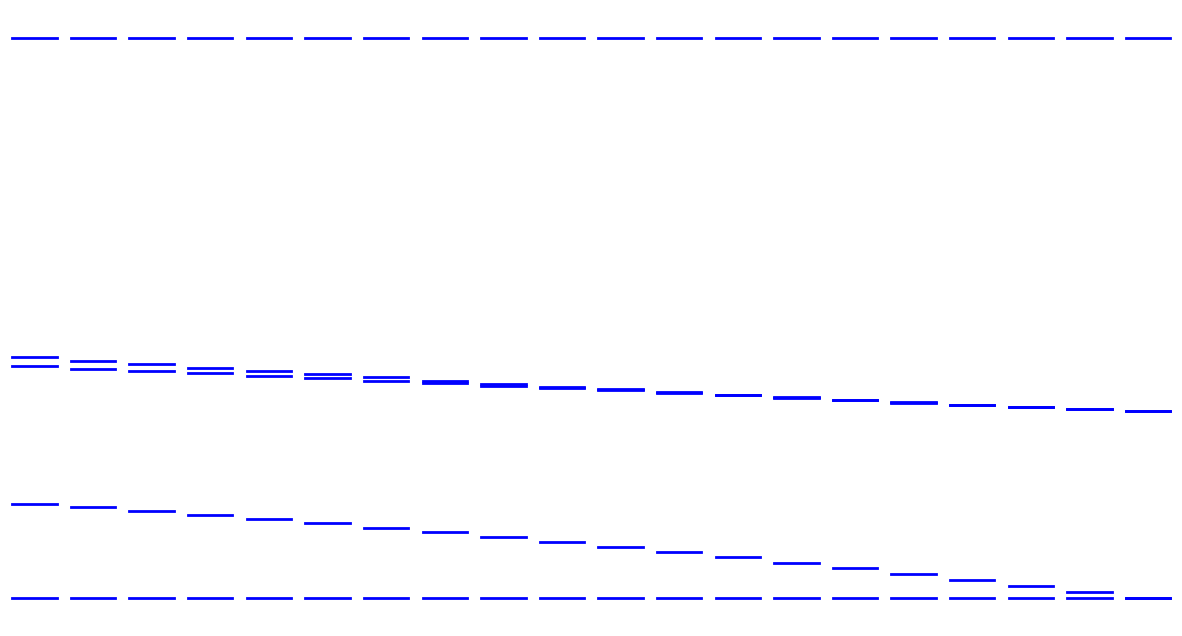

In [5]:
fig, ax = plt.subplots(ncols=20, nrows=1, figsize=(15, 8))
P0_range = np.linspace(0.1, 1, 20)
H_list = [pt.hamiltonian(Ec, Ej * pt.EJ_tanh_pulse(T1, p, R0, T1), N, ng) for p in P0_range] 
[qt.plot_energy_levels([h], fig=fig, ax=ax[i], N = 5) for i, h in enumerate(H_list)]

  0%|          | 0/200 [00:00<?, ?it/s]

  6%|▋         | 13/200 [01:11<17:13,  5.52s/it]


KeyboardInterrupt: 

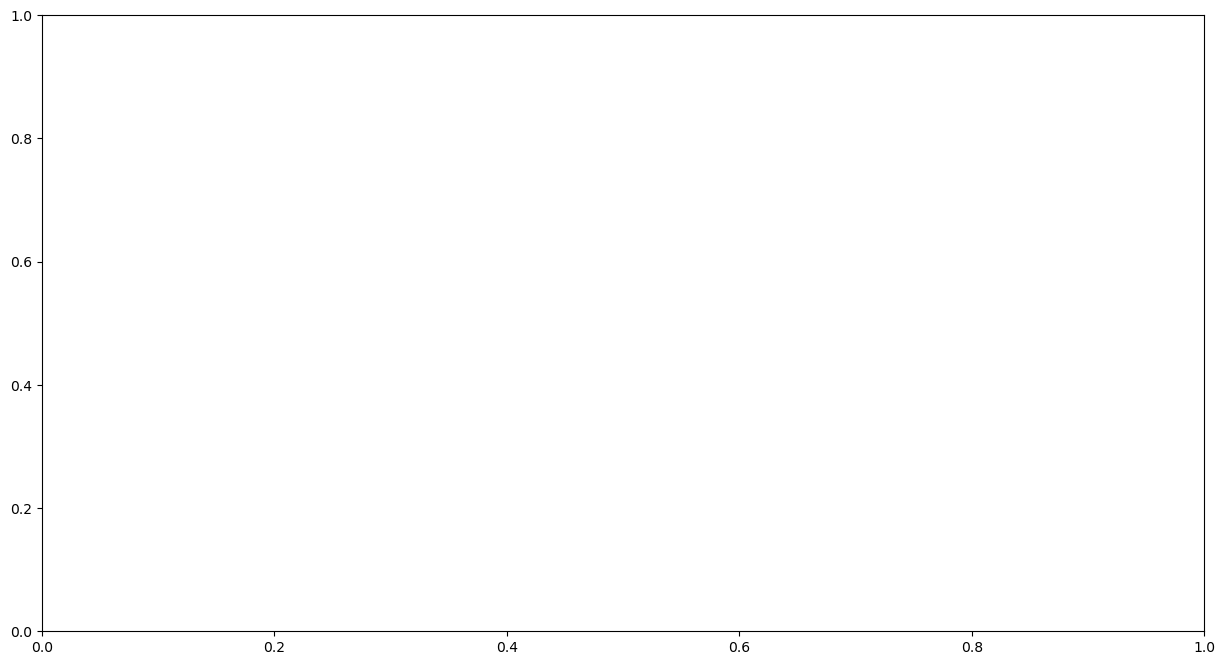

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))
tlist = np.linspace(0, T_max, Points)

f_0 = []
f_1 = []
T2_range = np.linspace(0, 6, 200)

for T2 in tqdm(T2_range):

    Ovrlps1 = pt.calculate_overlap(tlist, N, Ec, Ej, ng, T1, T2, T_max, P0, R0, Points, states = [-1, 0], initial_state=1)
    Ovrlps0 = pt.calculate_overlap(tlist, N, Ec, Ej, ng, T1, T2, T_max, P0, R0, Points, states = [-1, 0], initial_state=0)

    f_0.append(Ovrlps0[0][-1])
    f_1.append(Ovrlps1[0][-1])


plt.plot(T2_range, f_0, label= "Ground State")
plt.plot(T2_range, f_1, label = "1st Excited State")
plt.legend()
plt.show()

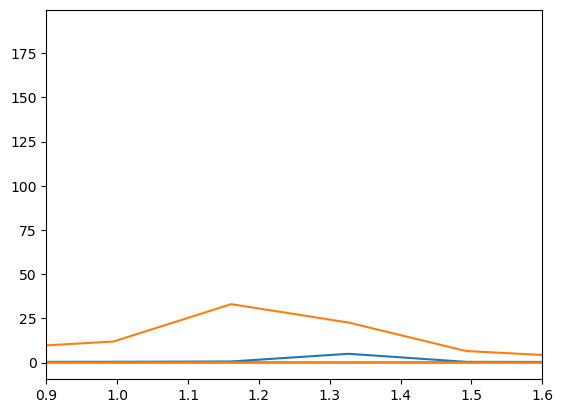

In [25]:
sp1 = np.fft.fft(f_0)
freq1 = np.fft.fftfreq(len(f_0), T2_range[1] - T2_range[0])
plt.plot(freq1, np.abs(sp1))
plt.xlim(0.9, 1.6)

sp1 = np.fft.fft(f_1)
freq1 = np.fft.fftfreq(len(f_1), T2_range[1] - T2_range[0])
plt.plot(freq1, np.abs(sp1))

# Variation of the EJ Depth

In [11]:
from scipy.signal import find_peaks
N = 10
Ec = 1.0
Ej = 50.0
ng=0.5
T_max = 300
T1 = 100
T2 = 350
Points=10000
#P0=0.99
R0 = 100 * np.pi


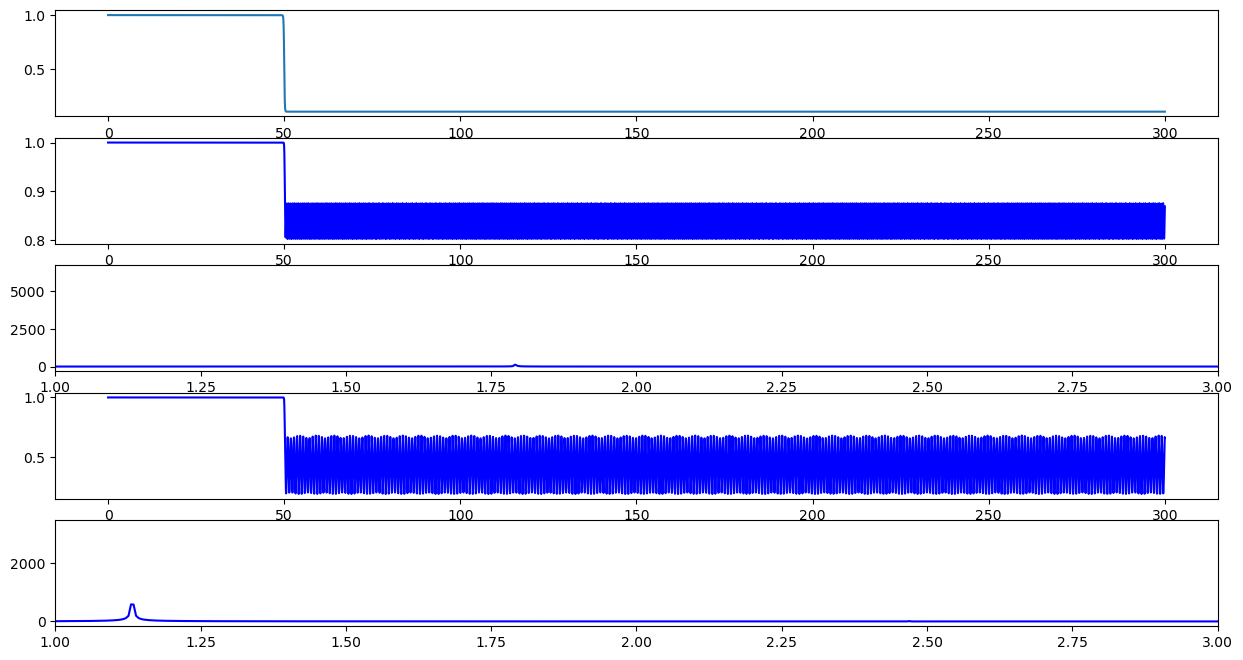

In [21]:



fig, ax = plt.subplots( nrows=5, ncols= 1,figsize=(15, 8))
tlist = np.linspace(0, T_max, Points)

tlist_cut = tlist[tlist > T1*0.7]
freq = np.fft.rfftfreq(len(tlist_cut), tlist_cut[1] - tlist_cut[0])

P0_range = np.linspace(0.7, 1, 20)

colors = plt.cm.winter(np.linspace(0,1,len(P0_range)))

s0_freqs = []
s1_freqs = []

for i, P0 in tqdm(enumerate(P0_range)):

    Ovrlps1 = pt.calculate_overlap(tlist, N, Ec, Ej, ng, T1, T2, T_max, P0, R0, Points, states = [-1, 0], initial_state=1)
    Ovrlps0 = pt.calculate_overlap(tlist, N, Ec, Ej, ng, T1, T2, T_max, P0, R0, Points, states = [-1, 0], initial_state=0)

    sp0 = np.fft.rfft(Ovrlps0[0][tlist > T1*0.7])    
    sp1 = np.fft.rfft(Ovrlps1[0][tlist > T1*0.7])    
    
    sp0_peaks, _ = find_peaks(np.abs(sp0))
    sp0_max_peak = sp0_peaks[np.argmax(np.abs(sp0[sp0_peaks]))]
    freq_max_0 = freq[sp0_max_peak]
    s0_freqs.append(freq_max_0)
    sp1_peaks, _ = find_peaks(np.abs(sp1))
    sp1_max_peak = sp1_peaks[np.argmax(np.abs(sp1[sp1_peaks]))]
    freq_max_1 = freq[sp1_max_peak]
    s1_freqs.append(freq_max_1)
    ax[0].plot(tlist, pt.EJ_double_pulse(tlist, P0, R0, T1, T2), color = colors[i])
    ax[1].plot(tlist, Ovrlps0[0], color = colors[i])
    ax[2].plot(freq, np.abs(sp0), color = colors[i])
    ax[2].plot(freq_max_0, sp0_max_peak, color = "red")
    ax[3].plot(tlist, Ovrlps1[0], color = colors[i])
    ax[4].plot(freq, np.abs(sp1), color = colors[i])
    ax[4].plot(freq_max_1, sp1_max_peak, color = "red")
    ax[2].set_xlim(1, 3)
    ax[4].set_xlim(1, 3)    


plt.show()

ValueError: x and y must have same first dimension, but have shapes (20,) and (1,)

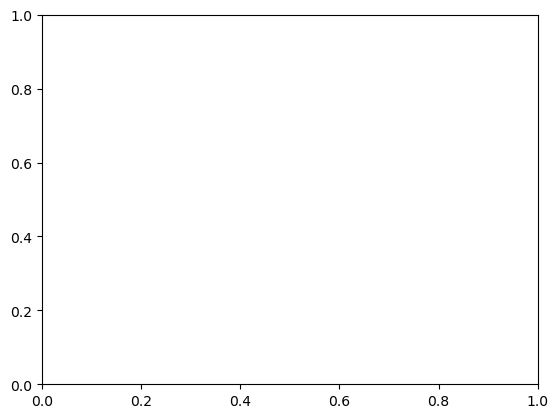

In [19]:
P0_range = np.linspace(0.7, 1, 20)
EJ_list = np.array([Ej * pt.EJ_tanh_pulse(T1, p, R0, T1) for p in P0_range])
plt.plot(Ej - EJ_list, s0_freqs,label= "Ground state")
plt.plot(Ej - EJ_list, s1_freqs,label = "1st excited state")

plt.xlabel("Ej value (GHz)")
plt.ylabel("Frequency (GHz)")
plt.legend()
plt.show()

print( Ej  - Ej * pt.EJ_tanh_pulse(T1, P0_range[np.argmin(s1_freqs)], R0, T1) )


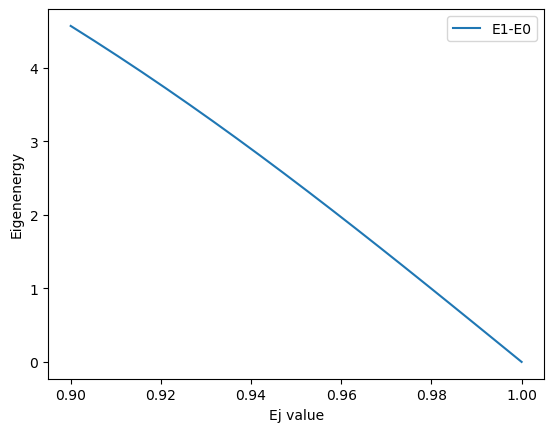

In [12]:
P0_range = np.linspace(0.7, 1, 20)
H_list = [pt.hamiltonian(Ec, Ej * pt.EJ_tanh_pulse(T1, p, R0, T1), N, ng) for p in P0_range] 
H_labels = [f"{p: .2f}" for p in P0_range]
E_list = np.array([pt.hamiltonian(Ec, Ej * pt.EJ_tanh_pulse(T1, p, R0, T1), N, ng).eigenenergies() for p in P0_range])
EJ_list = np.array([Ej * pt.EJ_tanh_pulse(T1, p, R0, T1) for p in P0_range])
E_g = E_list[:, 1] - E_list[:, 0]
#plt.plot(EJ_list, E_list[:, 0], label="E0")
#plt.plot(EJ_list, E_list[:, 1], label="E1")
plt.plot(Ej- EJ_list, E_g, label = "E1-E0")
plt.legend()
plt.xlabel("Ej value")
plt.ylabel("Eigenenergy")
plt.show()

# Test